In [1]:
import os
import re
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [63]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))
len(df)

47419

In [65]:
df = df.merge(pd.read_parquet(os.path.join("data","cnb_vyber.parquet")), left_index=True, right_index=True, how='inner')

In [8]:
len(df)

43749

In [66]:
df['titul_delka'] = df['titul'].apply(lambda x: len(x.split(' ')))

<Axes: xlabel='rok'>

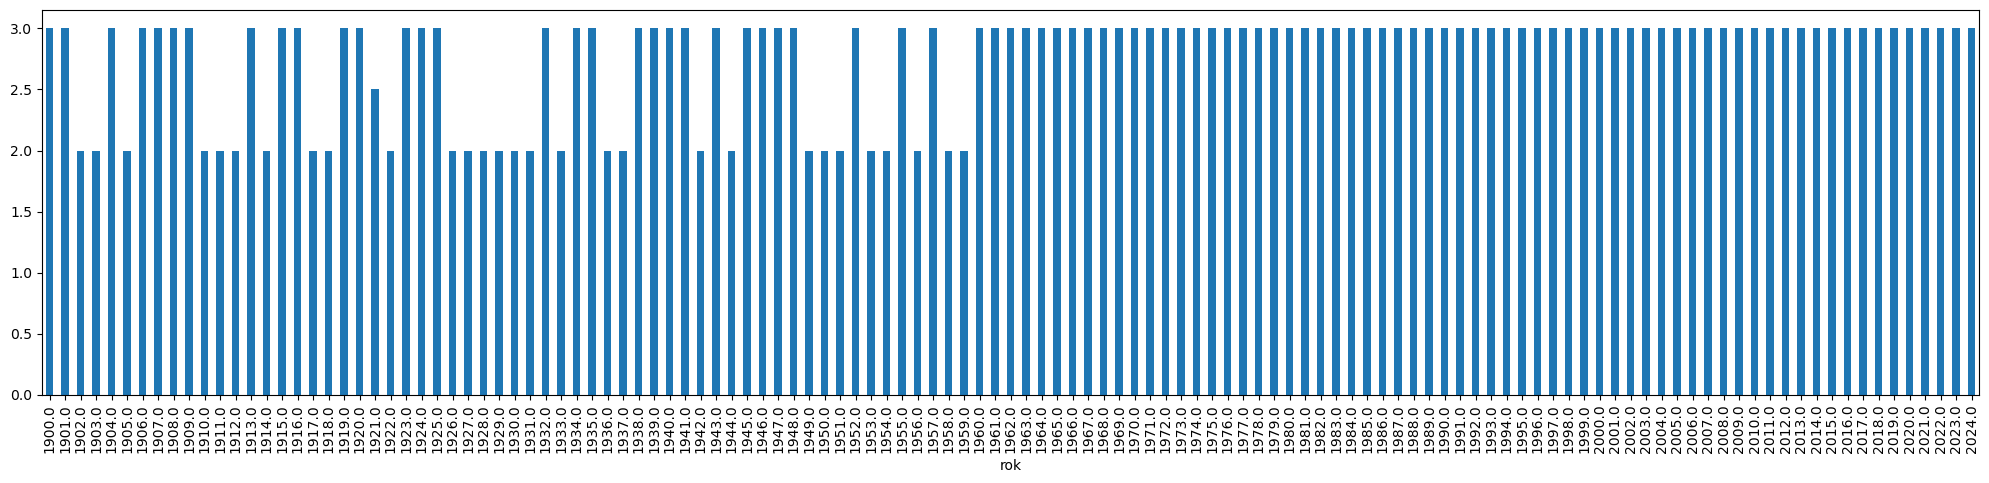

In [13]:
df.groupby('rok')['titul_delka'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

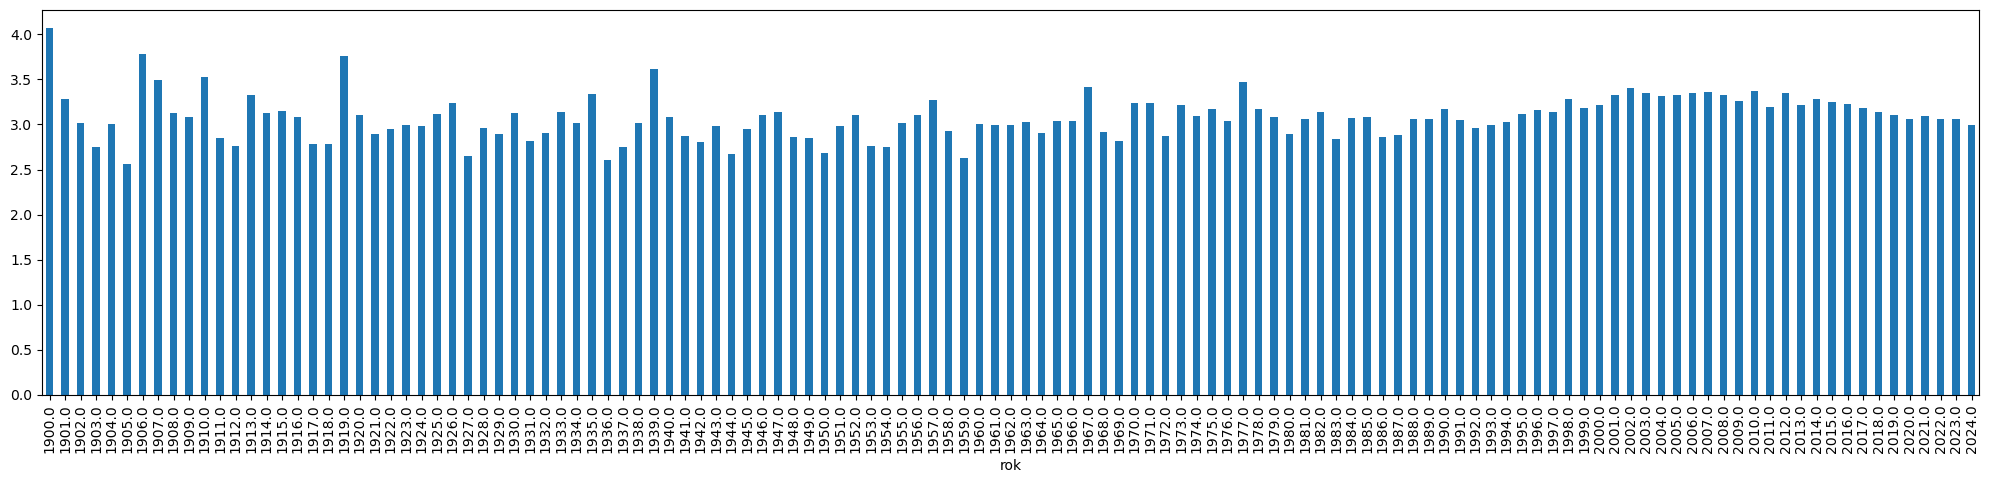

In [15]:
df.groupby('rok')['titul_delka'].mean().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

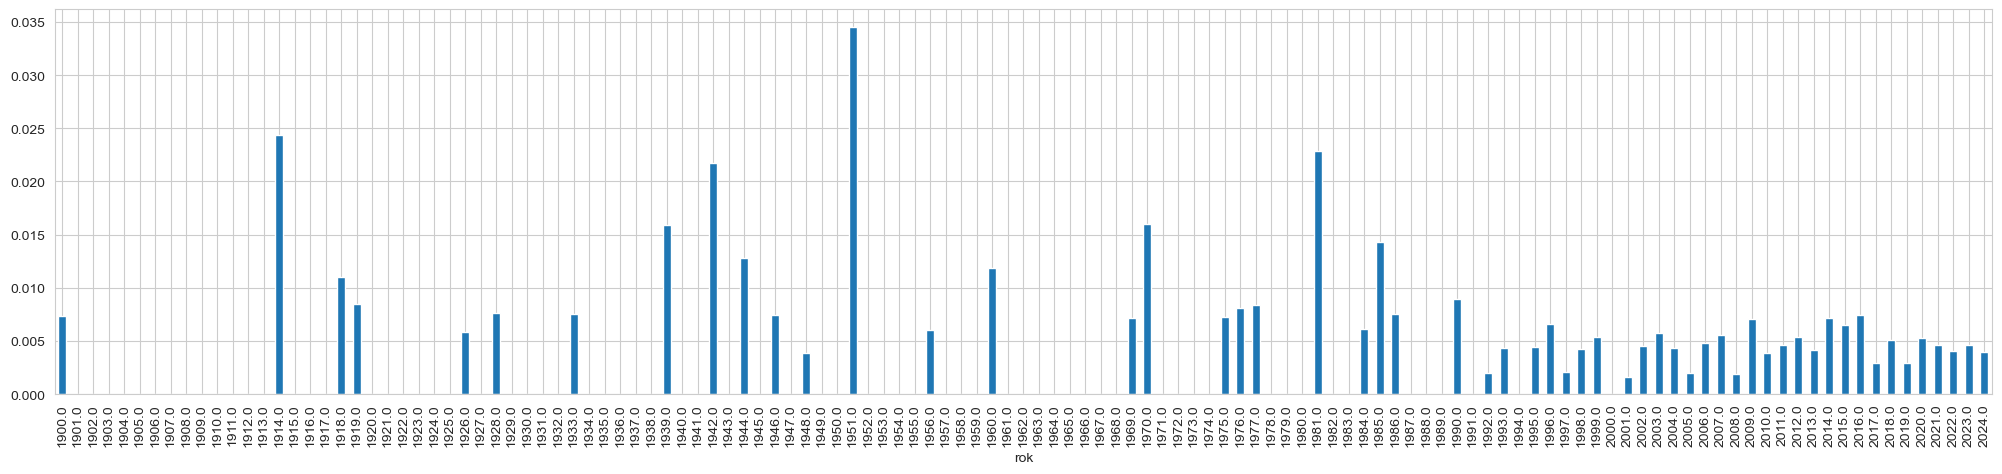

In [101]:
(df[(df['titul'].str.contains(', kte[rř]',na=False,regex=True))].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

C:\Users\micha\AppData\Local\Temp\ipykernel_33400\2818745031.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df[(df['titul'].str.contains('[Nn]ah(ot|ý|á|é)',na=False,regex=True))].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))


<Axes: xlabel='rok'>

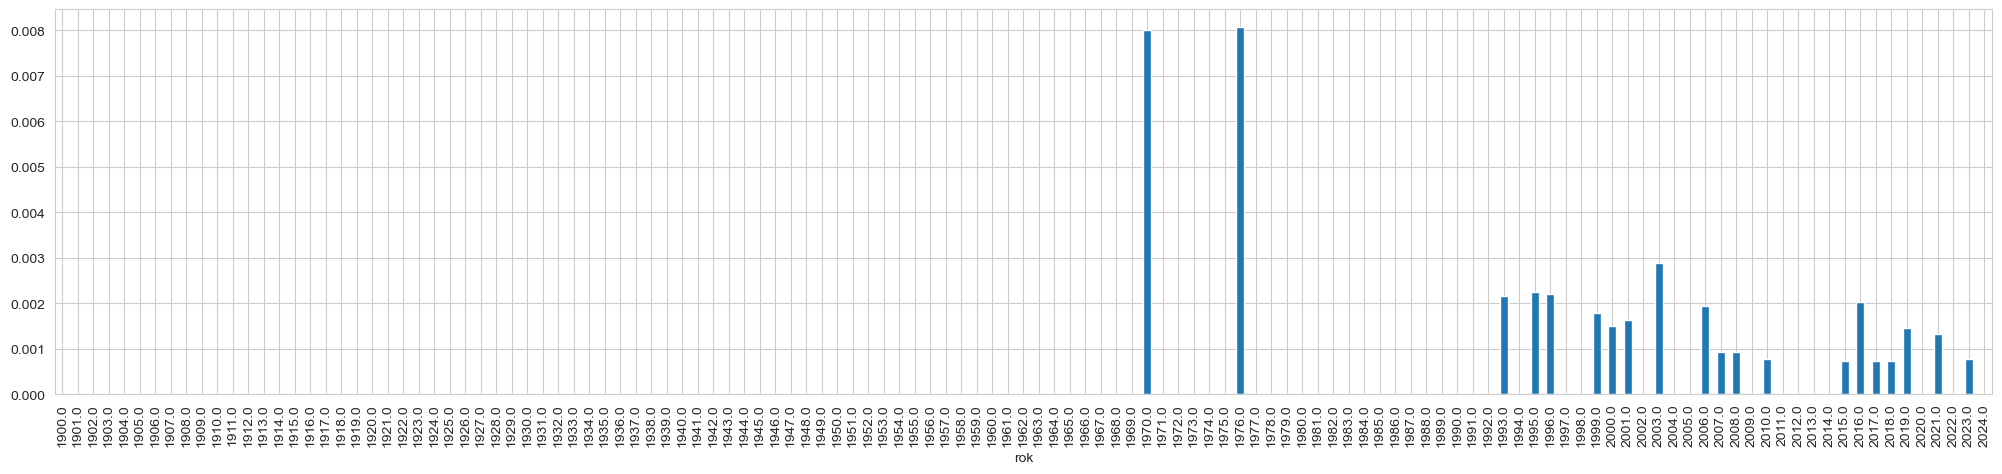

In [119]:
(df[(df['titul'].str.contains('[Nn]ah(ot|ý|á|é)',na=False,regex=True))].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

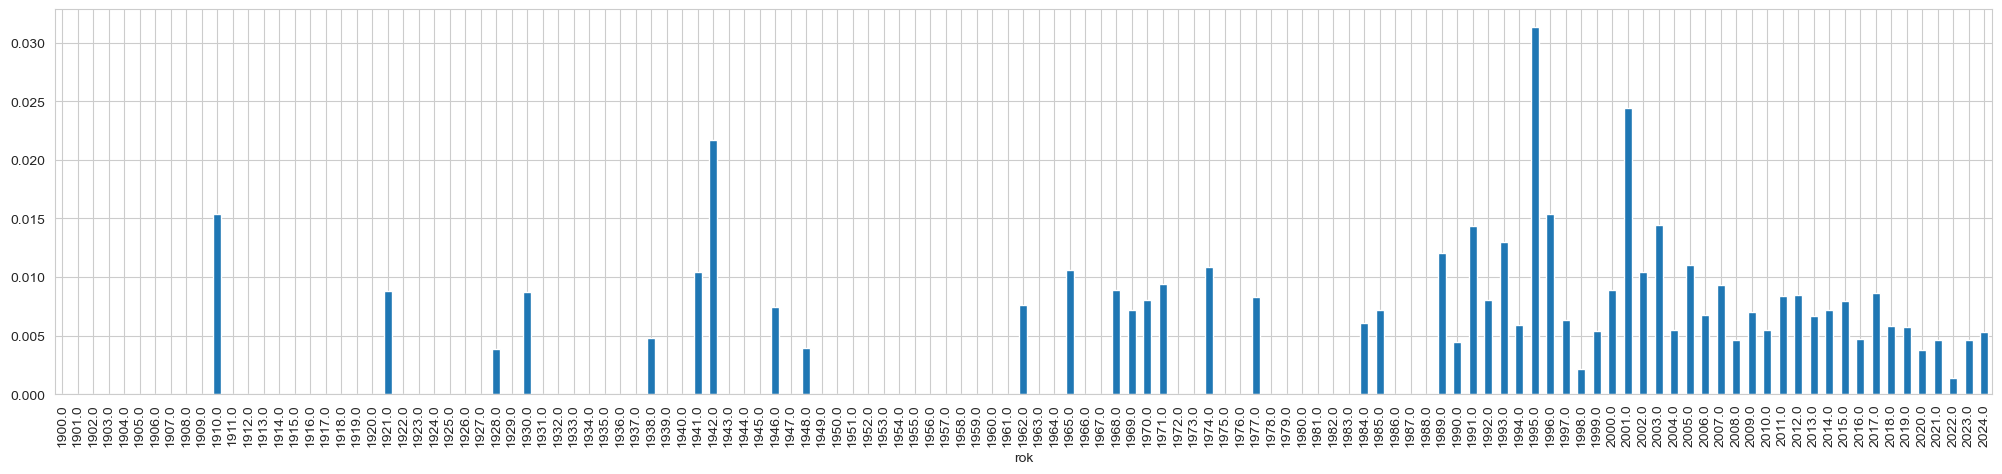

In [117]:
(df[(df['titul'].str.contains('[Vv]ražd',na=False,regex=True))].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

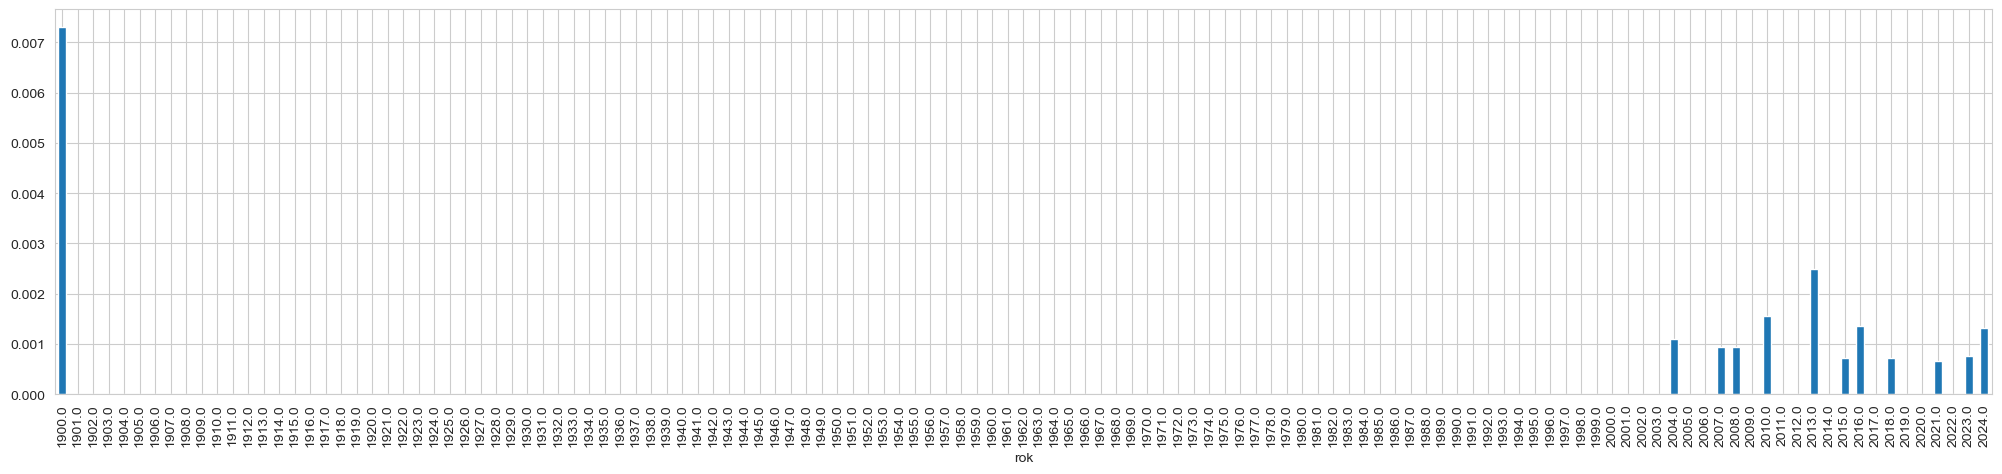

In [111]:
(df[(df['titul'].str.contains('žrout',na=False,regex=True))].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [109]:
df[df['rok'] > 2021]['titul'].sample(20)

001
nkc20243611860                   Antík a Závistník
nkc20233544420             Zlatíčko už bude hodný!
nkc20233554478                       Pastelkožrout
nkc20233577144                   Koťátko a zajíček
nkc20223462674                      Listy z Mexika
nkc20243590791                 Za všechno může pes
nkc20233536801                        Krev je voda
nkc20233546581             Průvodce Věkem přízraků
nkc20243584447                       Strážci živlů
nkc20223416452                   Návrat do neznáma
nkc20233523147                   Zítra přijde Olah
nkc20243602978        Vítek, křupadlo a kostižrout
nkc20243598792        Mezera mezi zdí a parketama.
nkc20223396556                   S orlem na zádech
nkc20243631355                               Lamač
nkc20243604591                    Deník malé Tonky
nkc20243613406                         Severní den
nkc20223474000    Podivné příhody ochránce přírody
nkc20243583466                 Reportér na odstřel
nkc20243606870             

<Axes: xlabel='rok'>

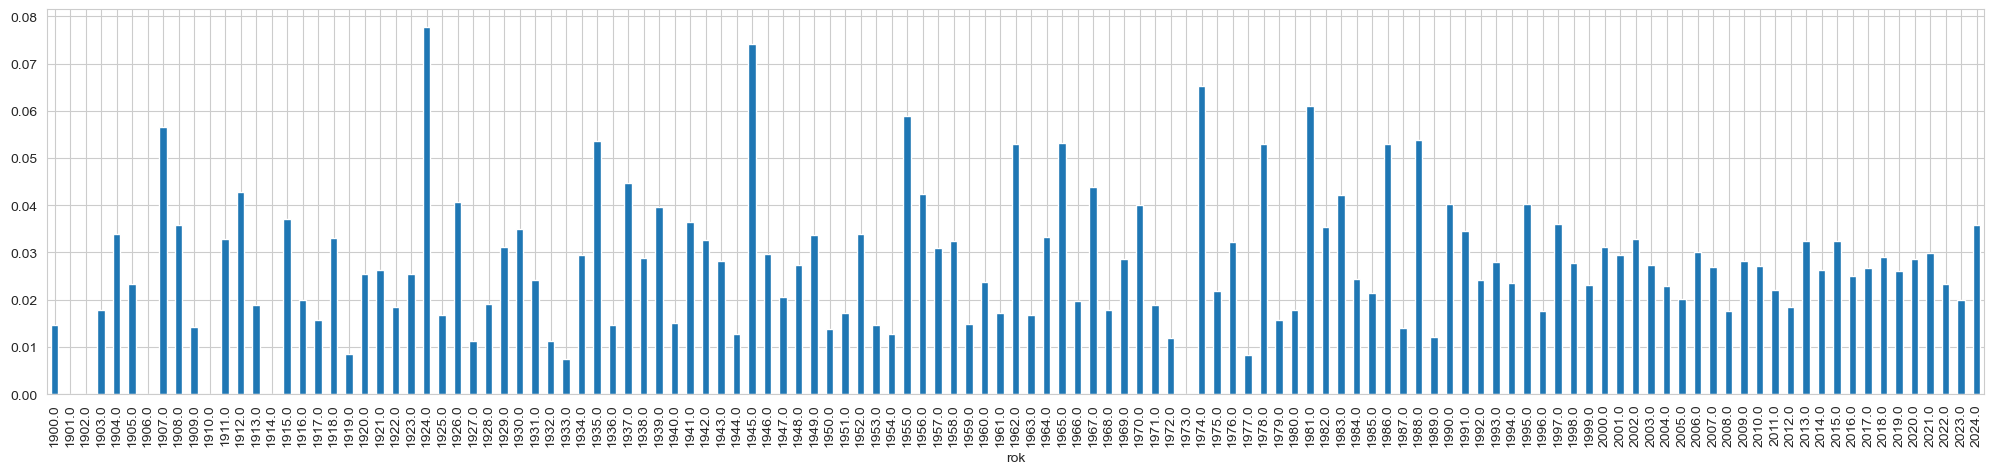

In [97]:
(df[(df['titul'].str.contains(' z ',na=False)) & (df['titul_delka'] <= 4)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

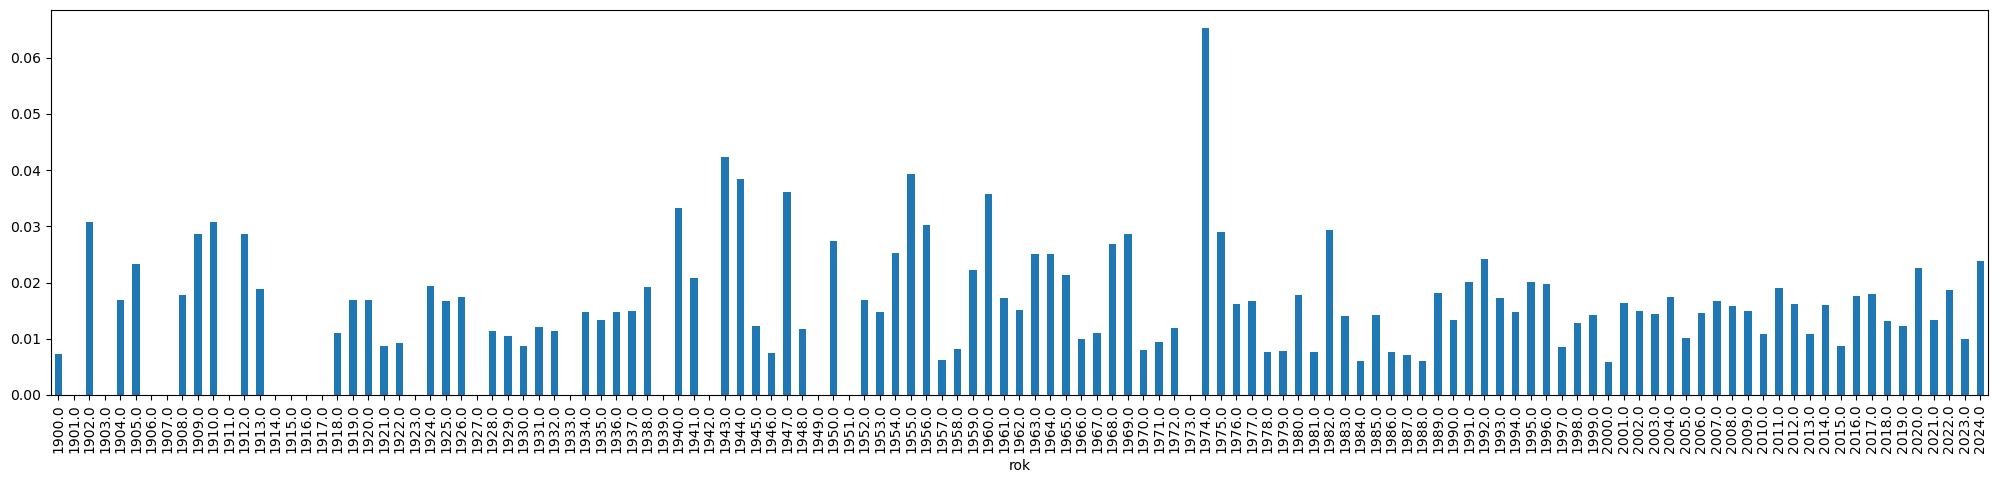

In [25]:
(df[(df['titul'].str.contains(' v ',na=False)) & (df['titul_delka'] == 3)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

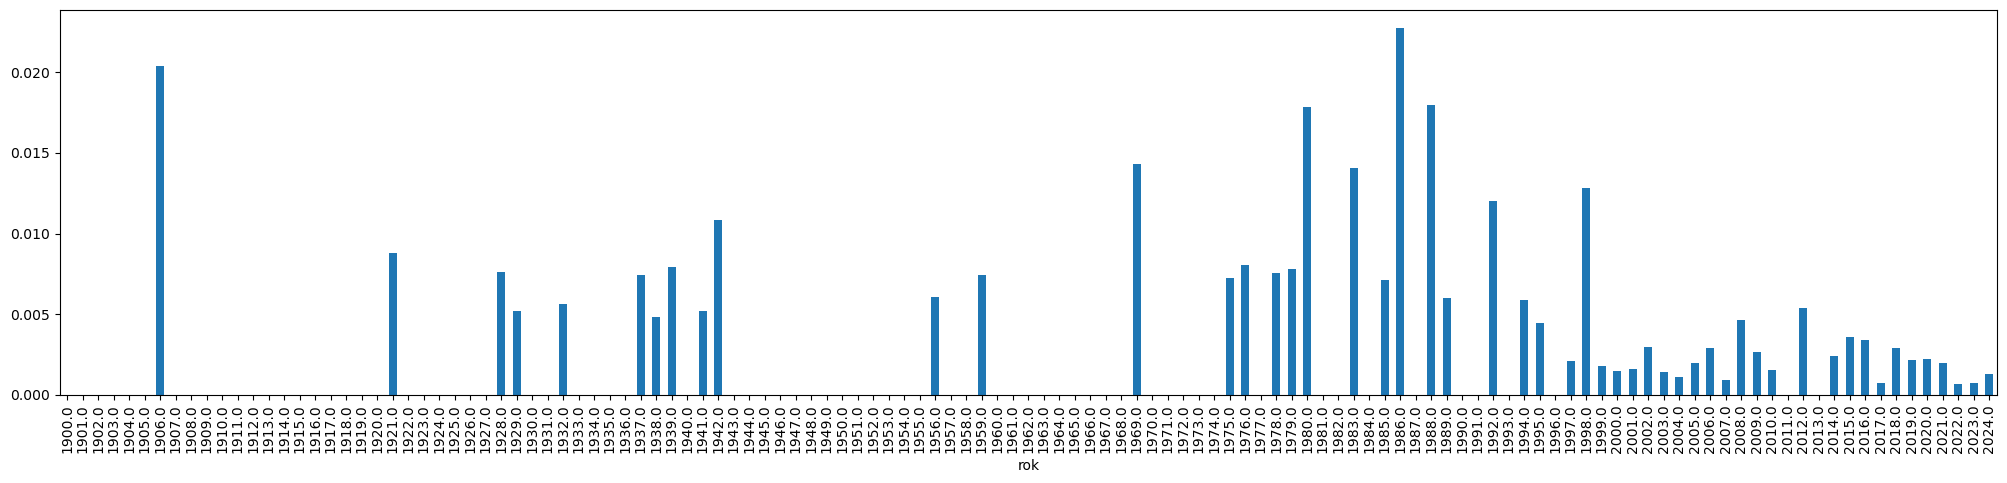

In [27]:
(df[(df['titul'].str.contains(' bez ',na=False)) & (df['titul_delka'] == 3)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

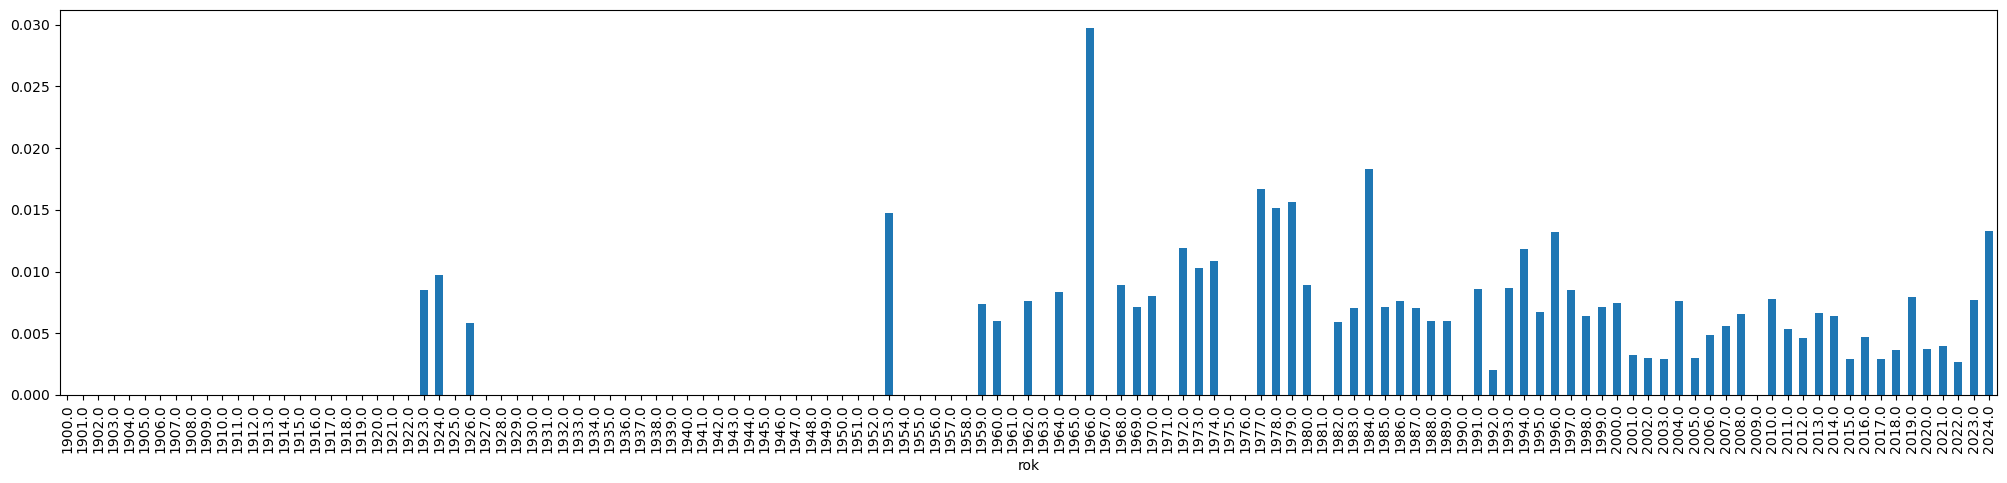

In [33]:
(df[(df['titul'].str.contains(' pro ',na=False)) & (df['titul_delka'] == 3)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [37]:
df[(df['titul'].str.contains(' pro ',na=False)) & (df['titul_delka'] == 3)]['titul'].drop_duplicates()

001
cpk19990661936            Povídky pro Faiéky
bknmik12182          Příbuzenstvo pro kočku!
nkc20183058895               Říkání pro děti
bk195300674                      4:0 pro ATK
bk195904671           Pohádky pro rozcáplíky
bk196004029            Tajemství pro Barbaru
bk196205540                Vražda pro štěstí
bk196405164                Hotel pro cizince
bk196700939                    Vše pro firmu
bk196700090                 Čaj pro návštěvu
bk196604437                  Město pro mraky
bk196802965            Pohádky pro poškoláky
bk196900342             Zrcadlo pro Kristýnu
bk197100165                 Dárek pro Moniku
bk197204912                 Muž pro Oklahomu
nkc20102039643                Čas pro vítěze
bk197500690               Kytička pro štěstí
bk197703449                 Krajina pro tebe
bk197704654                    Místo pro tři
gk59251537                Křídla pro frajera
bk197901011                  Houpačka pro 17
bk197903095                 Růže pro Charóna
nkc201

<Axes: xlabel='rok'>

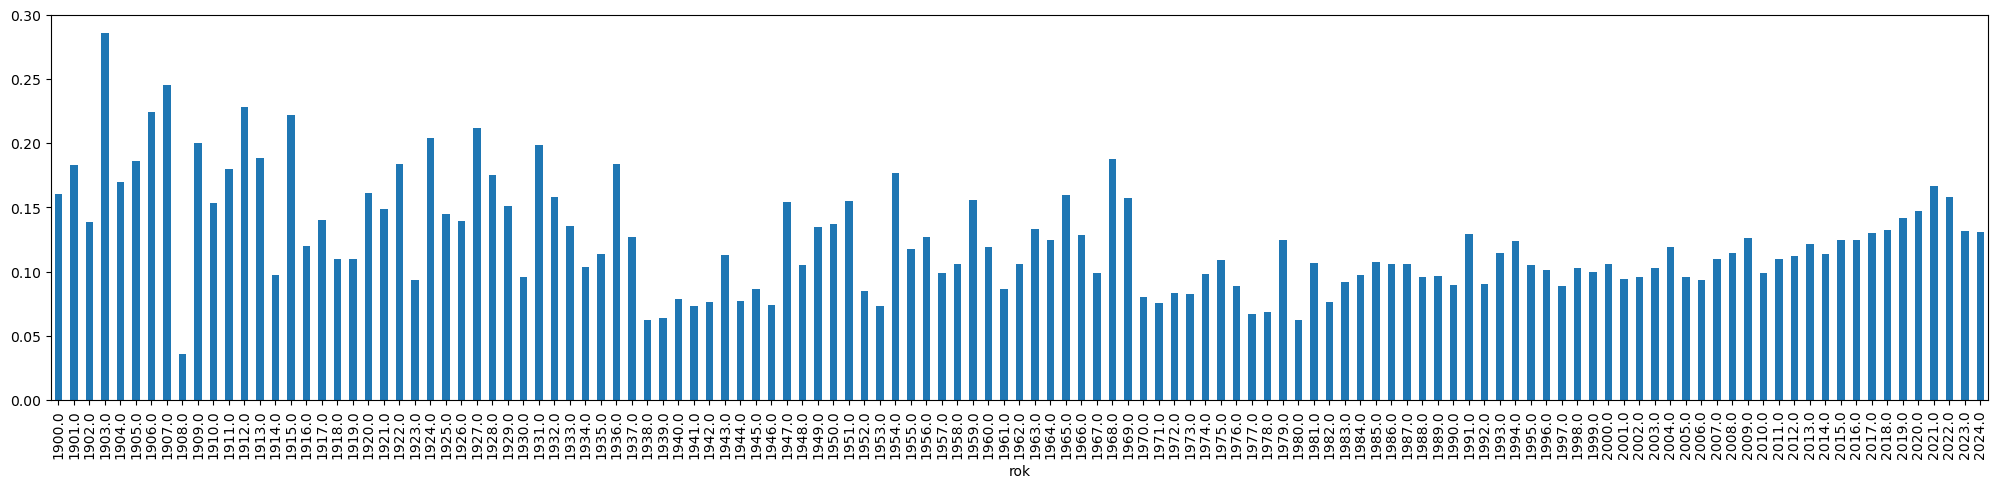

In [39]:
(df[df['titul_delka'] == 1].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

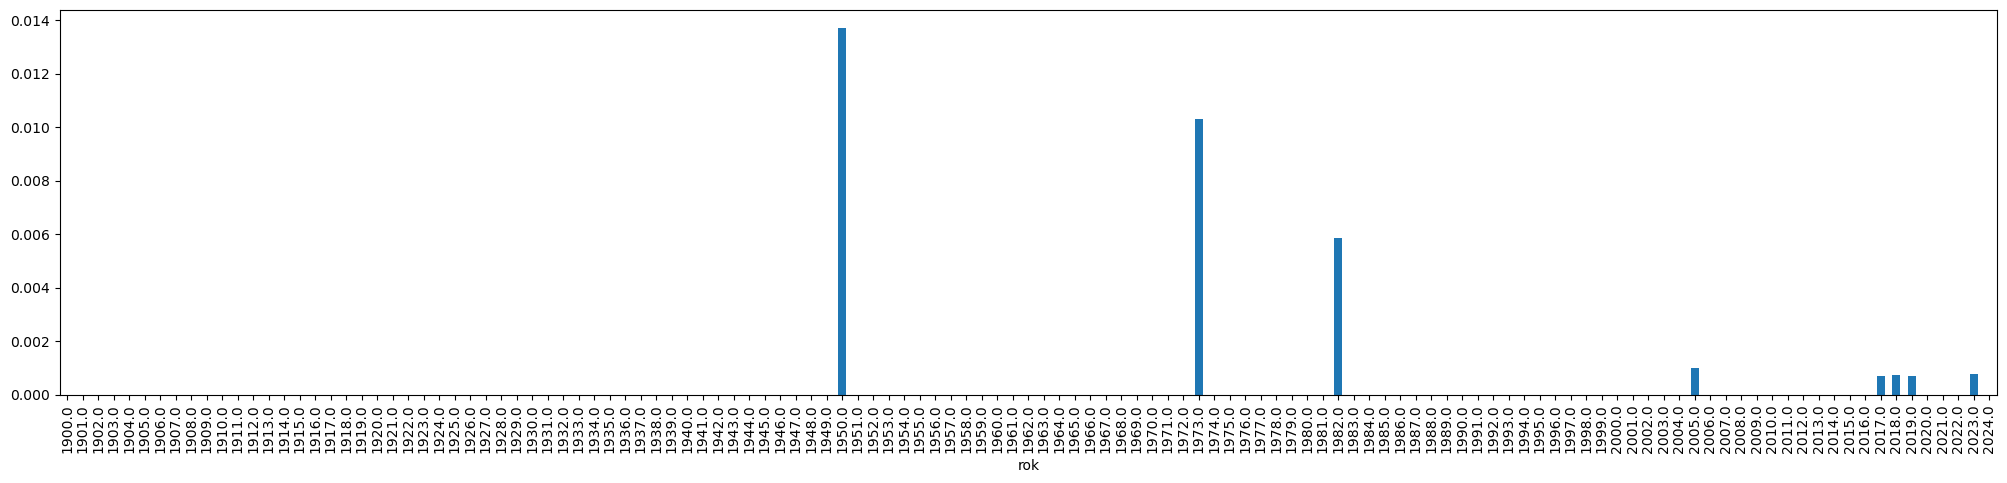

In [29]:
(df[(df['titul'].str.contains('Nejlepší ',na=False)) & (df['titul_delka'] == 2)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\micha\AppData\Local\Temp\ipykernel_33400\2868477835.py:1: SyntaxWarning: invalid escape sequence '\w'
  (df[(df['titul'].str.contains('Čes\w{1,10}\s',na=False, regex=True)) & (df['titul_delka'] == 2)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))


<Axes: xlabel='rok'>

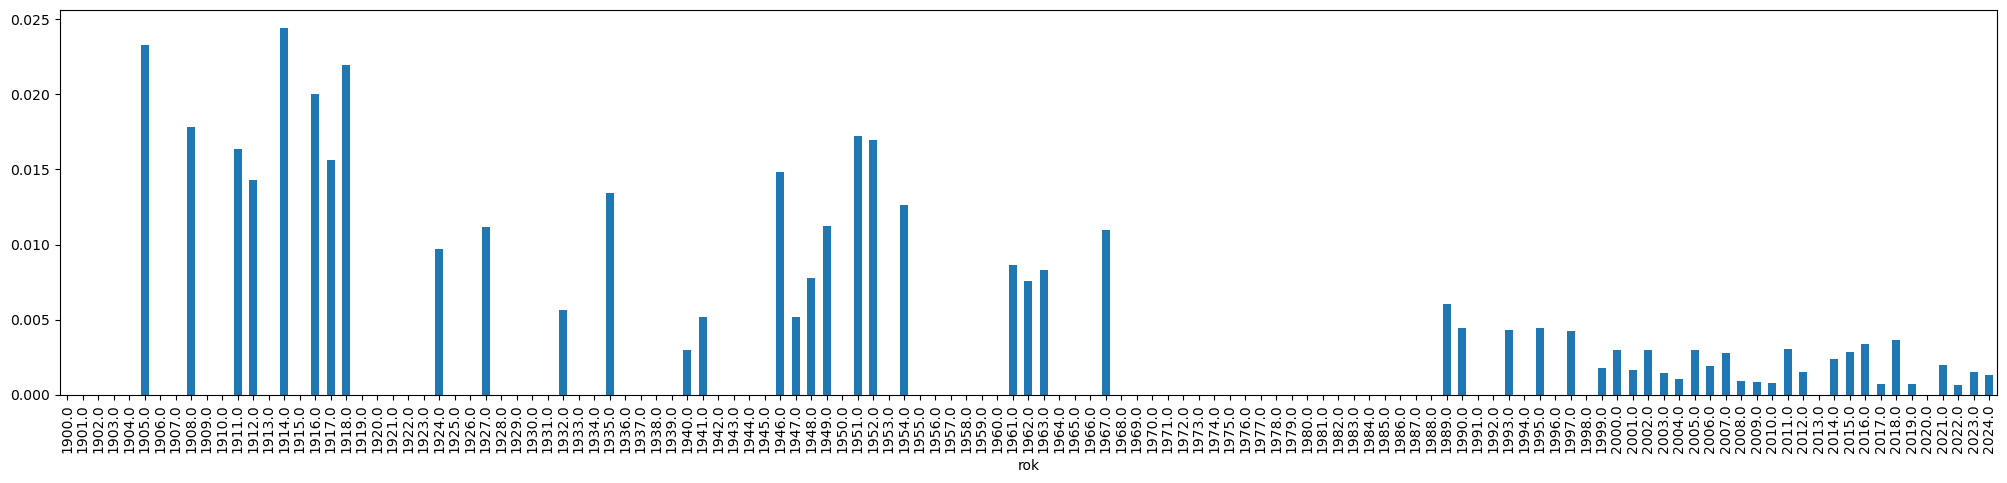

In [31]:
(df[(df['titul'].str.contains('Čes\w{1,10}\s',na=False, regex=True)) & (df['titul_delka'] == 2)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok', ylabel='titul_delka'>

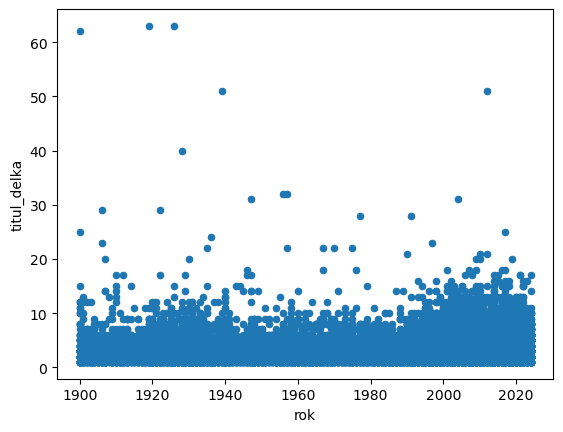

In [41]:
df.plot.scatter(x='rok',y='titul_delka')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


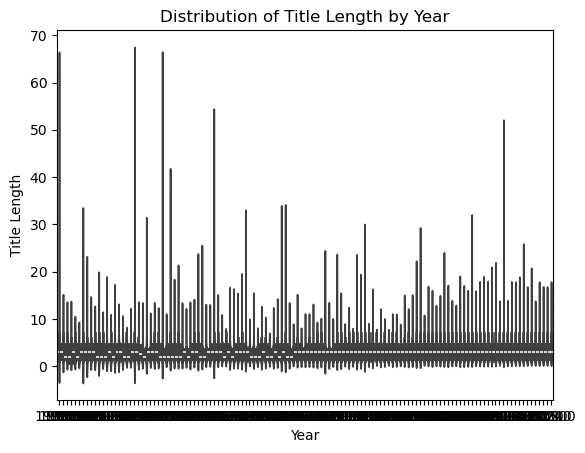

In [45]:
sns.violinplot(x='rok', y='titul_delka', data=df)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Title Length')
plt.title('Distribution of Title Length by Year')

# Show the plot
plt.show()

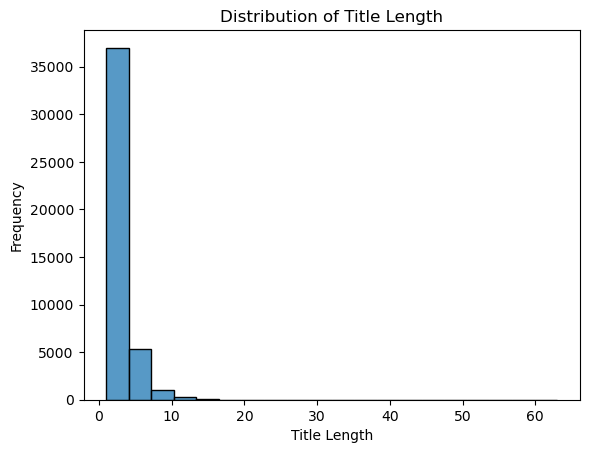

In [47]:
# Create a histogram with 20 bins (adjust as needed)
sns.histplot(data=df, x='titul_delka', bins=20)

# Add labels and a title
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Distribution of Title Length')

# Show the plot
plt.show()


C:\Users\micha\AppData\Local\Temp\ipykernel_33400\1031257157.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='titul_delka', shade=True)


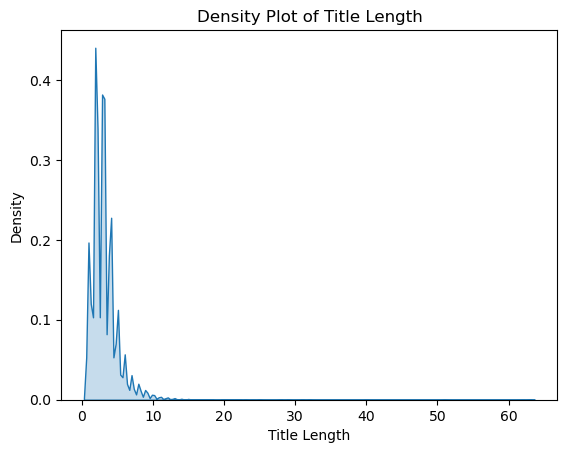

In [49]:
# Create a density plot
sns.kdeplot(data=df, x='titul_delka', shade=True)

# Add labels and a title
plt.xlabel('Title Length')
plt.ylabel('Density')
plt.title('Density Plot of Title Length')

# Show the plot
plt.show()

In [59]:
df

,x,y
0,1,2
1,2,4
2,3,3
3,4,5
4,5,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


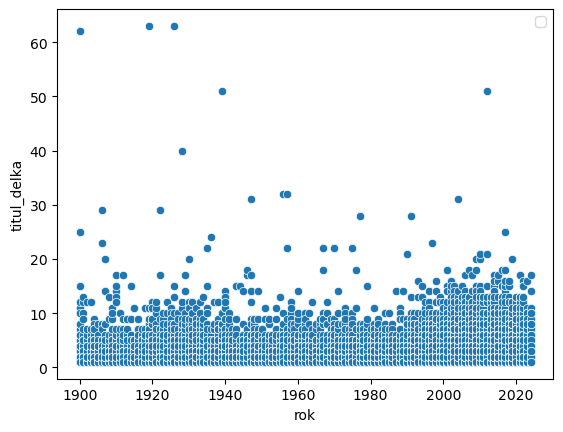

In [67]:
# Create a scatter plot
sns.scatterplot(data=df, x='rok', y='titul_delka')

# Calculate mean and median
#mean_y = df['titul_delka'].mean()
#median_y = df['titul_delka'].median()

# Plot horizontal lines
#plt.axhline(mean_y, color='red', linestyle='--', label=f'Mean: {mean_y:.2f}')
#plt.axhline(median_y, color='green', linestyle='--', label=f'Median: {median_y:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [79]:
def plot_title_length_distribution(df):
    # Calculate statistics separately for better clarity and error handling
    yearly_median = df.groupby('rok')['titul_delka'].median()
    yearly_q25 = df.groupby('rok')['titul_delka'].quantile(0.25)
    yearly_q75 = df.groupby('rok')['titul_delka'].quantile(0.75)
    
    # Combine the statistics
    yearly_stats = pd.DataFrame({
        'median': yearly_median,
        'q25': yearly_q25,
        'q75': yearly_q75
    }).reset_index()
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot the area between quartiles
    plt.fill_between(yearly_stats['rok'], 
                    yearly_stats['q25'], 
                    yearly_stats['q75'],
                    alpha=0.3, 
                    color='skyblue',
                    label='25th-75th percentile range')
    
    # Plot the median line
    plt.plot(yearly_stats['rok'], 
            yearly_stats['median'],
            color='navy',
            linewidth=2,
            label='Median')
    
    # Customize the plot
    plt.title('Distribution of Book Title Lengths Over Time', 
             fontsize=14, 
             pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Title Length', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add some styling
    sns.set_style("whitegrid")
    plt.tight_layout()
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\micha\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

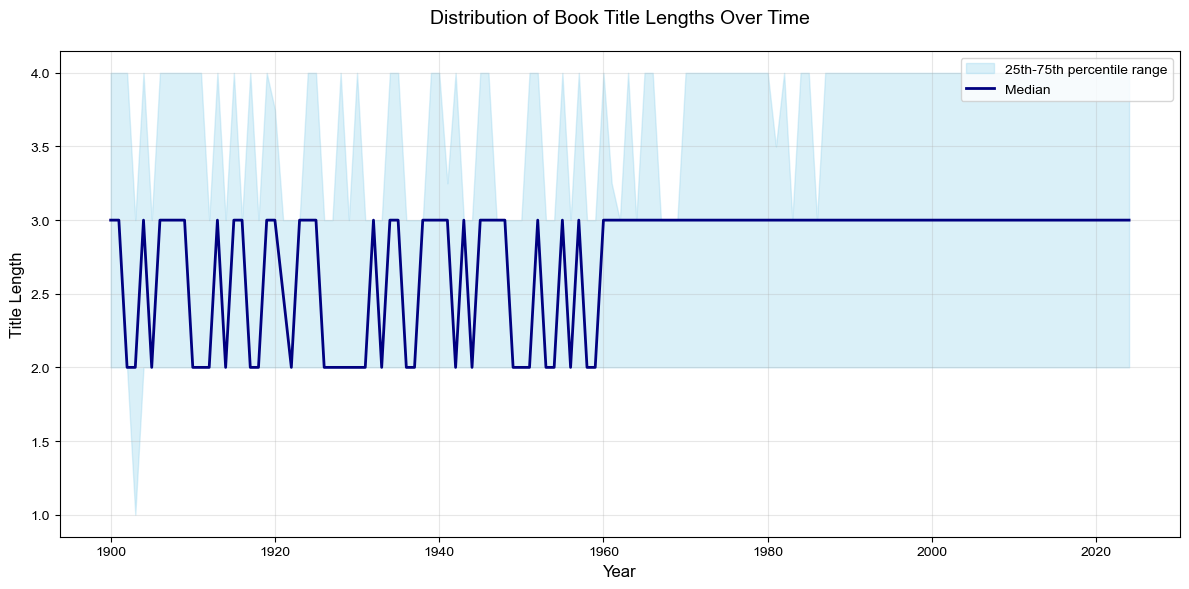

In [81]:
plot_title_length_distribution(df)

<Axes: xlabel='rok'>

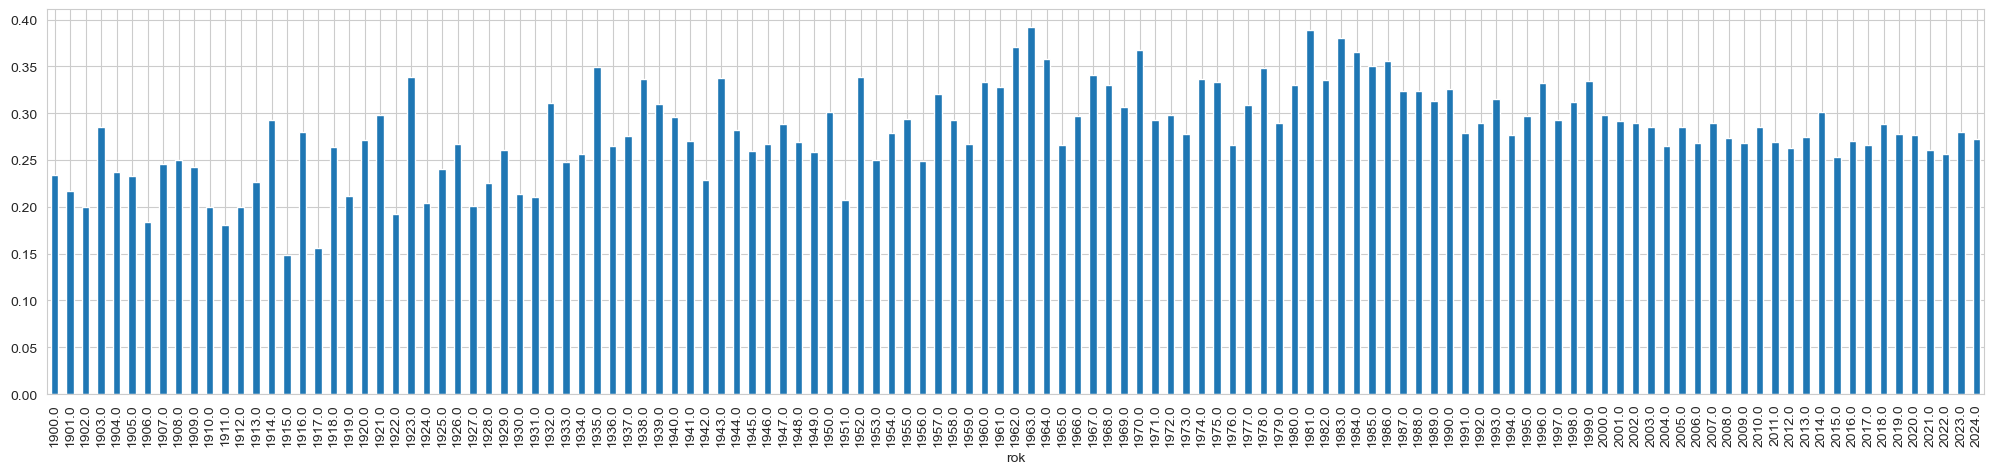

In [85]:
(df[df['titul_delka'] == 3].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

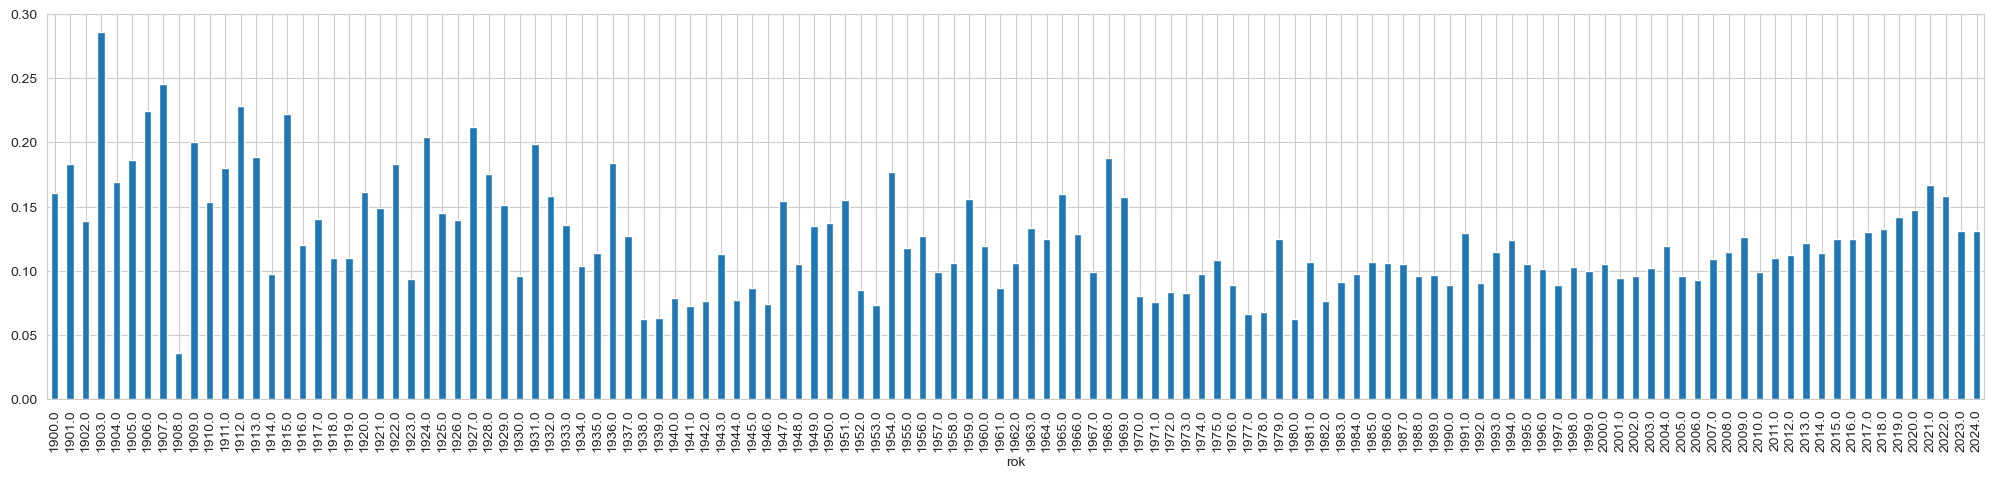

In [87]:
(df[df['titul_delka'] == 1].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

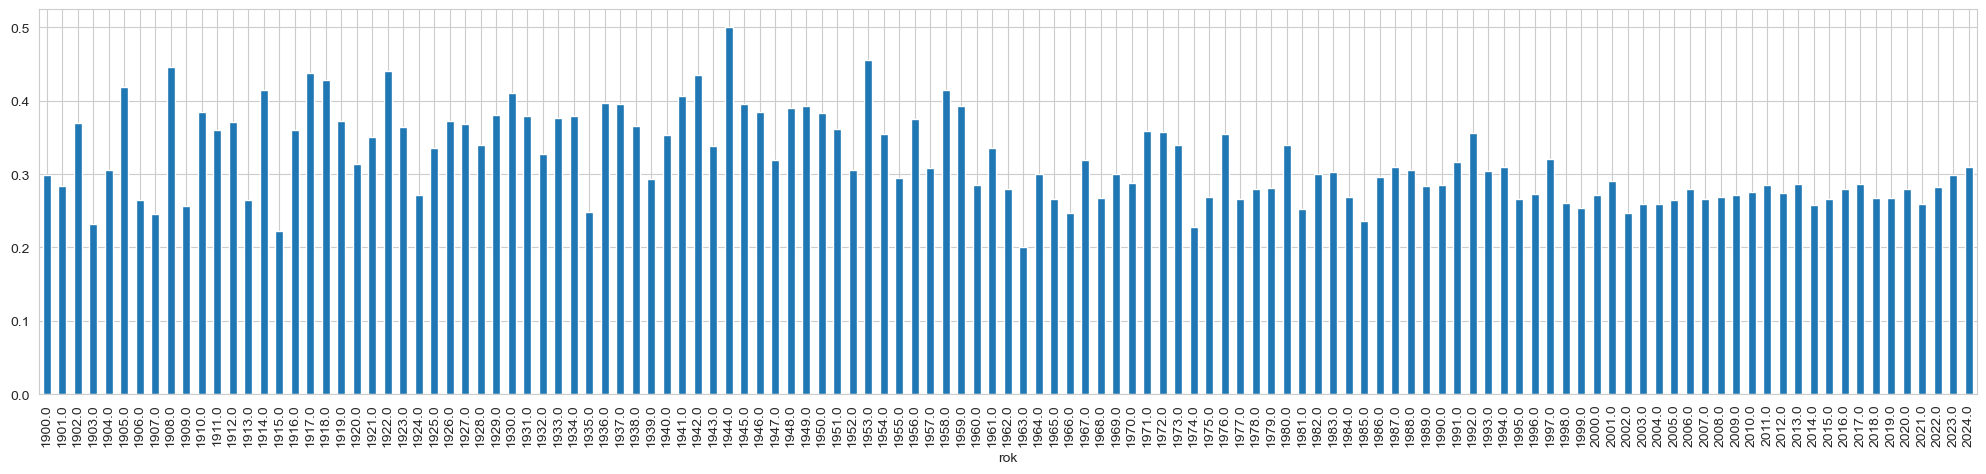

In [89]:
(df[df['titul_delka'] == 2].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

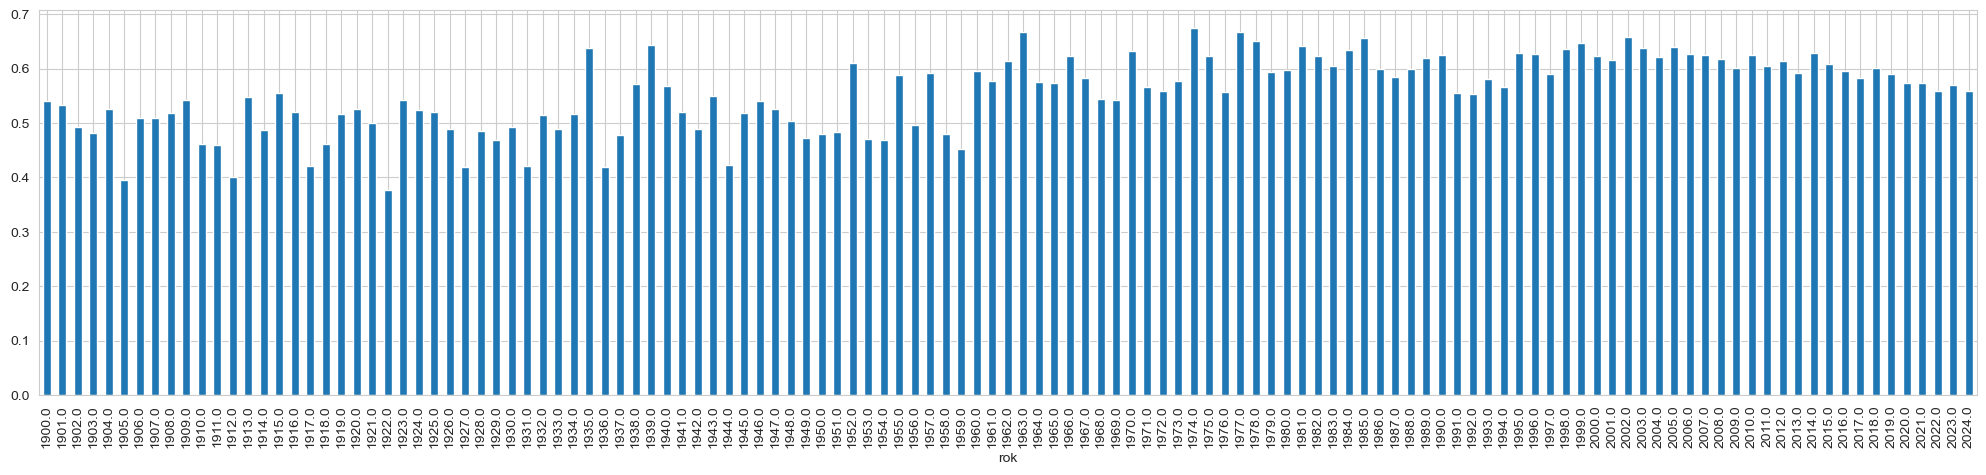

In [93]:
(df[df['titul_delka'] >= 3].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))